<a href="https://colab.research.google.com/github/MatviyStryzheus/LAB2.1/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

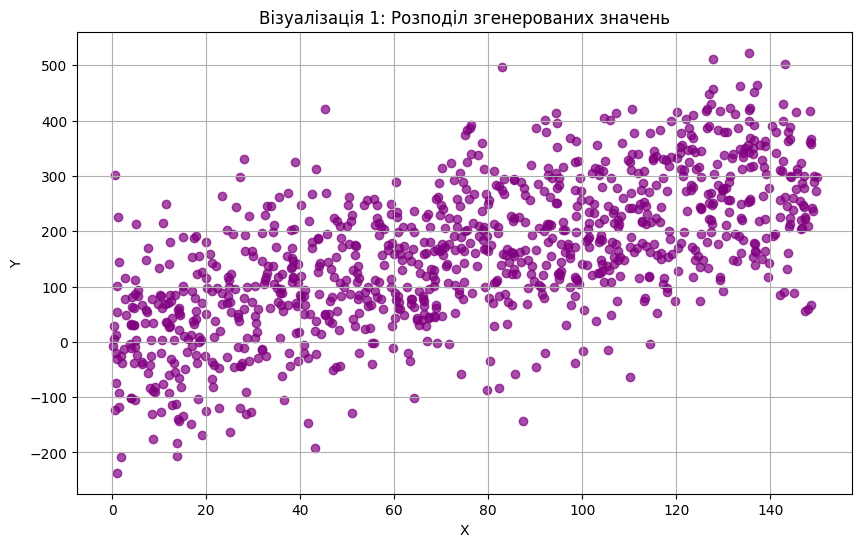

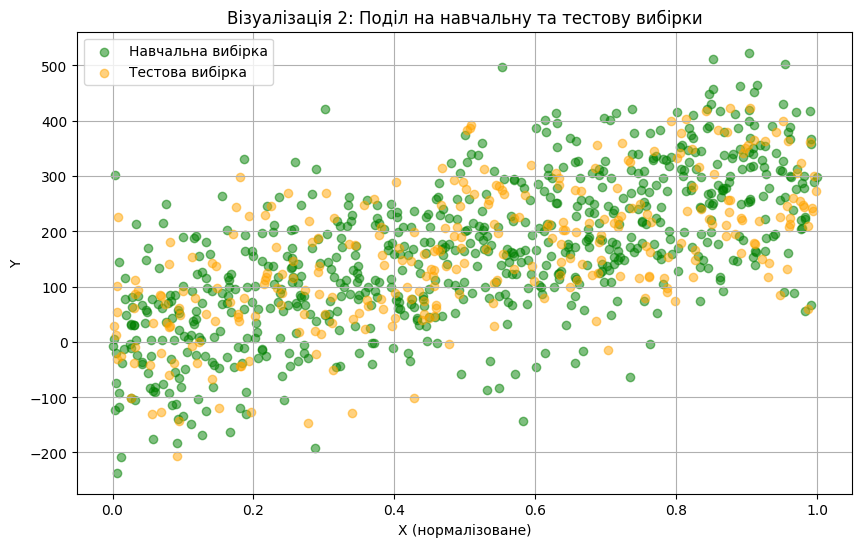

Оптимальне значення K: 19


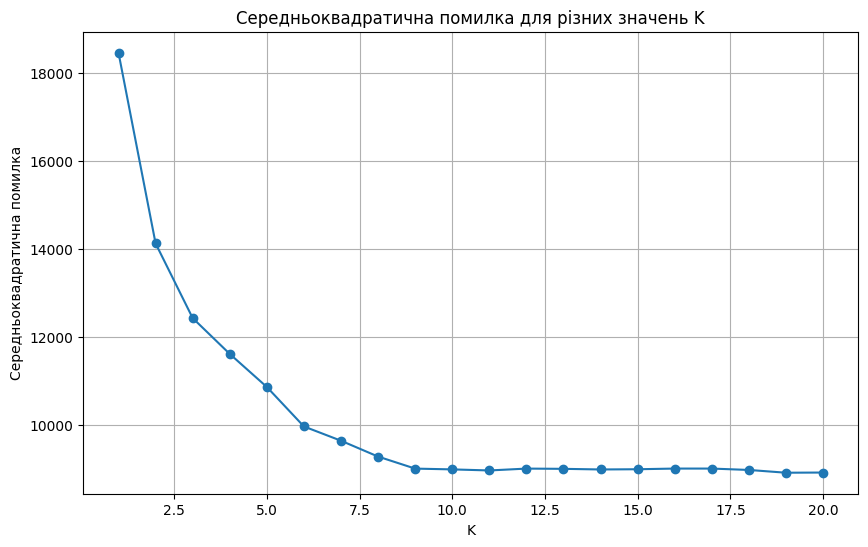

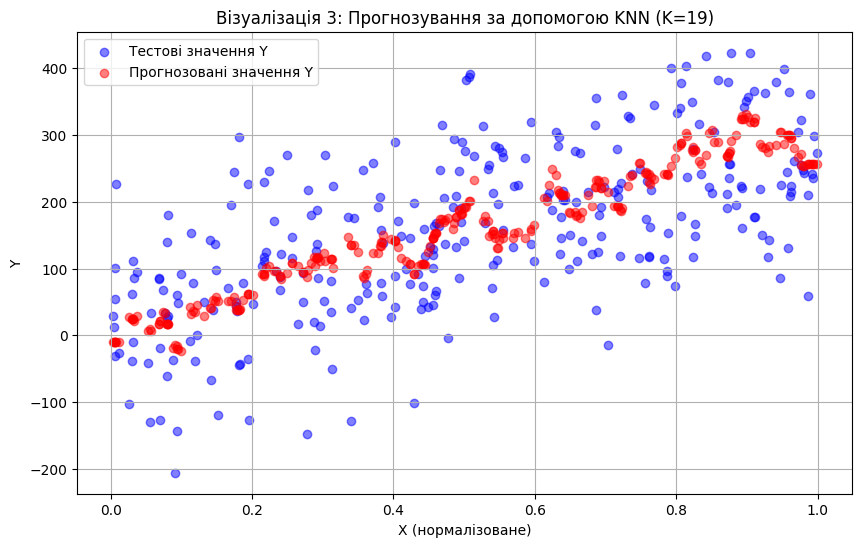

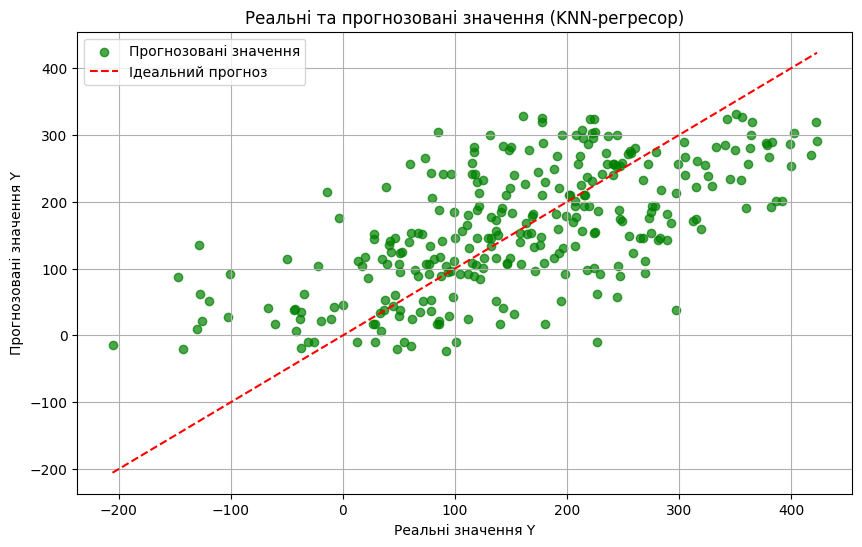

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 1) Згенерувати випадковий набір даних в діапазоні 1000 значень.
def generate_data(num_samples=1000):
    np.random.seed(40)
    X = np.random.rand(num_samples) * 150  # Випадкові значення X
    Y = 2 * X + np.random.randn(num_samples) * 100  # Генерація Y
    return X, Y

X, Y = generate_data()

# Візуалізація згенерованих даних
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='purple', alpha=0.7)
plt.title('Візуалізація 1: Розподіл згенерованих значень')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# 2) Нормалізувати значення.
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, 1))  # Нормалізація X
    return X_scaled

X_scaled = normalize_data(X)

# 3) Розділити існуючі записи на навчальну і тестові вибірки.
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Візуалізація навчальної та тестової вибірки
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='green', alpha=0.5, label='Навчальна вибірка')
plt.scatter(X_test, Y_test, color='orange', alpha=0.5, label='Тестова вибірка')
plt.title('Візуалізація 2: Поділ на навчальну та тестову вибірки')
plt.xlabel('X (нормалізоване)')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# 4) Навчити KNN-регресор з різними значеннями К.
def train_knn(X_train, Y_train, X_test, optimal_k=20):
    knn = KNeighborsRegressor(n_neighbors=optimal_k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    return Y_pred

# Список для зберігання помилок для різних значень K
errors = []
k_values = range(1, 21)  # Значення K від 1 до 20

for k in k_values:
    Y_pred = train_knn(X_train, Y_train, X_test, optimal_k=k)
    mse = mean_squared_error(Y_test, Y_pred)  # Обчислення середньоквадратичної помилки
    errors.append(mse)

# 5) Вибрати величину К для найкращих показників якості регресії у тестовій вибірці.
optimal_k = k_values[np.argmin(errors)]  # Вибір K з найменшою помилкою
print(f"Оптимальне значення K: {optimal_k}")

# Візуалізація помилок для різних значень K
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Середньоквадратична помилка для різних значень K')
plt.xlabel('K')
plt.ylabel('Середньоквадратична помилка')
plt.grid(True)
plt.show()

# 6) Здійснити візуалізації отриманих рішень.
# Навчання моделі з оптимальним K
Y_pred_best = train_knn(X_train, Y_train, X_test, optimal_k=optimal_k)

# Візуалізація прогнозування за допомогою KNN з оптимальним K
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', alpha=0.5, label='Тестові значення Y')
plt.scatter(X_test, Y_pred_best, color='red', alpha=0.5, label='Прогнозовані значення Y')
plt.title(f'Візуалізація 3: Прогнозування за допомогою KNN (K={optimal_k})')
plt.xlabel('X (нормалізоване)')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Візуалізація реальних та прогнозованих значень для тестової вибірки
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_best, color='green', alpha=0.7, label='Прогнозовані значення')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ідеальний прогноз')
plt.title('Реальні та прогнозовані значення (KNN-регресор)')
plt.xlabel('Реальні значення Y')
plt.ylabel('Прогнозовані значення Y')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
!pip install -U kaleido
